In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv('abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
data.shape

(4177, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sex                    4177 non-null   object 
 1   Length                 4177 non-null   float64
 2   Diameter               4177 non-null   float64
 3   Height                 4177 non-null   float64
 4   Whole_weight           4177 non-null   float64
 5   Shucked_weight         4177 non-null   float64
 6   Viscera_weight         4177 non-null   float64
 7   Shell_weight           4177 non-null   float64
 8   Class_number_of_rings  4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df=pd.DataFrame(data=data)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
df.isnull()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
4172,False,False,False,False,False,False,False,False,False
4173,False,False,False,False,False,False,False,False,False
4174,False,False,False,False,False,False,False,False,False
4175,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

Sex                      0
Length                   0
Diameter                 0
Height                   0
Whole_weight             0
Shucked_weight           0
Viscera_weight           0
Shell_weight             0
Class_number_of_rings    0
dtype: int64

In [8]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Length                      AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Diameter                 AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Height                   AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Whole_weight             AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Shucked_weight           AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Viscera_weight           AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Shell_weight             AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Class_number_of_rings          AxesSubplot(0.125,0.125;0.0945122x0.343182)
dtype: object

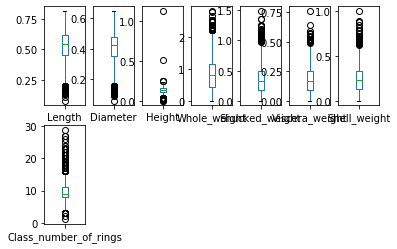

In [9]:
df.plot(kind='box',subplots=True,layout=(2,7))

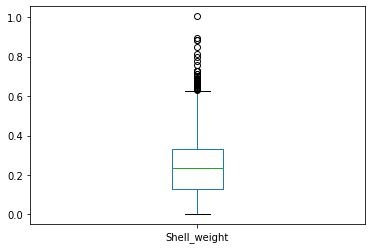

In [10]:
df['Shell_weight'].plot.box()

In [11]:
le=LabelEncoder()

In [12]:
df['Sex']=le.fit_transform(df['Sex'])

In [13]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:
z=np.abs(zscore(df))
z

array([[1.15198011, 0.57455813, 0.43214879, ..., 0.72621157, 0.63821689,
        1.57154357],
       [1.15198011, 1.44898585, 1.439929  , ..., 1.20522124, 1.21298732,
        0.91001299],
       [1.28068972, 0.05003309, 0.12213032, ..., 0.35668983, 0.20713907,
        0.28962385],
       ...,
       [1.15198011, 0.6329849 , 0.67640943, ..., 0.97541324, 0.49695471,
        0.28962385],
       [1.28068972, 0.84118198, 0.77718745, ..., 0.73362741, 0.41073914,
        0.02057072],
       [1.15198011, 1.54905203, 1.48263359, ..., 1.78744868, 1.84048058,
        0.64095986]])

In [15]:
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [16]:
threshold=3
dfnc=df[(z<3).all(axis=1)]
dfnc.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [17]:
dfnc.shape

(4027, 9)

In [18]:
dfnc.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Sex                         AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Length                   AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Diameter                 AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Height                   AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Whole_weight             AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Shucked_weight           AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Viscera_weight           AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Shell_weight                   AxesSubplot(0.125,0.125;0.0945122x0.343182)
Class_number_of_rings       AxesSubplot(0.238415,0.125;0.0945122x0.343182)
dtype: object

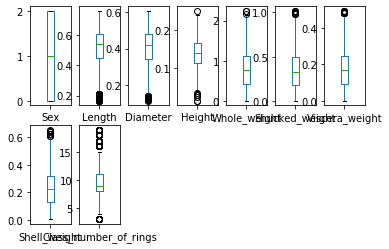

In [19]:
dfnc.plot(kind='box',subplots=True,layout=(2,7))

In [20]:
dfnc.corr()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
Sex,1.000000,-0.043639,-0.046531,-0.046282,-0.034776,-0.016457,-0.045292,-0.043825,-0.033272
Length,-0.043639,1.000000,0.986011,0.895432,0.934410,0.909245,0.907957,0.914518,0.567074
Diameter,-0.046531,0.986011,1.000000,0.901803,0.934069,0.904302,0.904192,0.921779,0.584978
Height,-0.046282,0.895432,0.901803,1.000000,0.891783,0.843010,0.869273,0.899716,0.612540
Whole_weight,-0.034776,0.934410,0.934069,0.891783,1.000000,0.971024,0.966612,0.961216,0.548295
Shucked_weight,-0.016457,0.909245,0.904302,0.843010,0.971024,1.000000,0.930154,0.896220,0.440424
Viscera_weight,-0.045292,0.907957,0.904192,0.869273,0.966612,0.930154,1.000000,0.919414,0.522917
Shell_weight,-0.043825,0.914518,0.921779,0.899716,0.961216,0.896220,0.919414,1.000000,0.622872
Class_number_of_rings,-0.033272,0.567074,0.584978,0.612540,0.548295,0.440424,0.522917,0.622872,1.000000


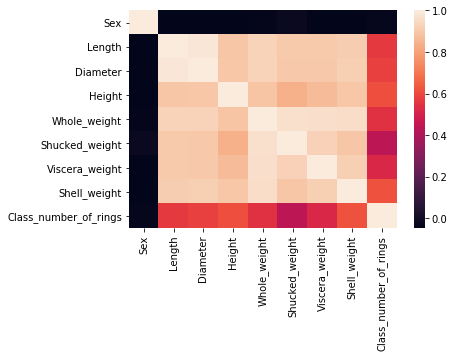

In [21]:
sns.heatmap(dfnc.corr())

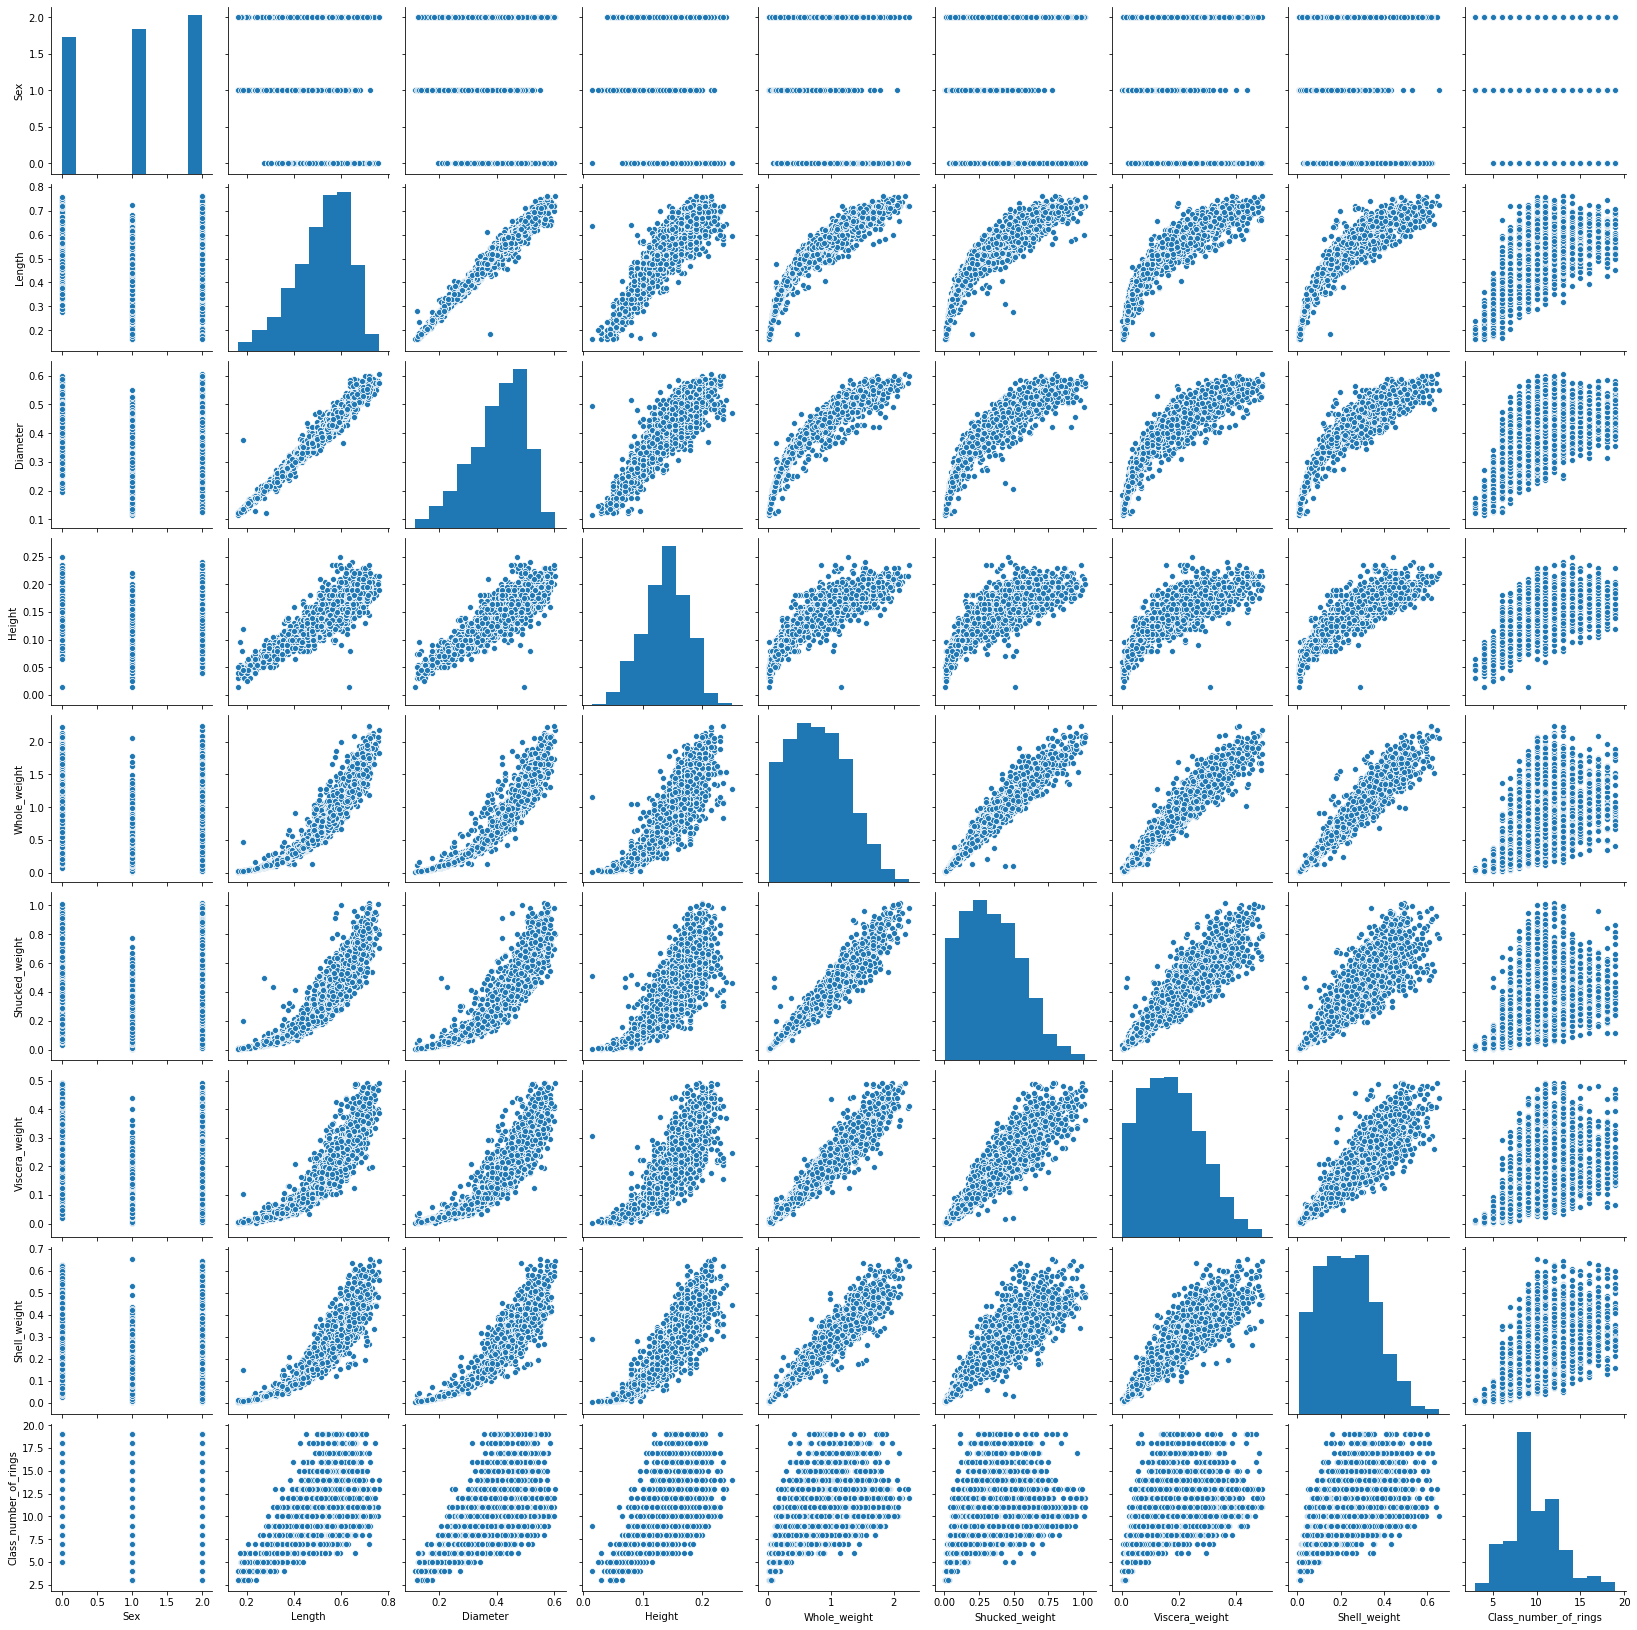

In [22]:
sns.pairplot(dfnc)

In [23]:
x=dfnc.iloc[:,0:-1]
x.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [24]:
x.shape

(4027, 8)

In [25]:
y=dfnc.iloc[:,-1]
y.head()

0    15
1     7
2     9
3    10
4     7
Name: Class_number_of_rings, dtype: int64

In [26]:
y.shape

(4027,)

In [27]:
lm=LinearRegression(normalize=True)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=100)

In [29]:
x_train.shape

(3141, 8)

In [30]:
y_train.shape

(3141,)

In [31]:
x_test.shape

(886, 8)

In [32]:
y_test.shape

(886,)

In [33]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [34]:
lm.score(x_train,y_train)

0.5113949521070416

In [35]:
from sklearn.linear_model import Lasso,Ridge

In [36]:
ls=Lasso(alpha=0.01)
ls.fit(x_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [37]:
ls.score(x_train,y_train)

0.47777057328033673

In [38]:
from sklearn.linear_model import ElasticNet

In [39]:
el=ElasticNet()

In [40]:
el.fit(x_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
el.score(x_train,y_train)

0.04997993429050718

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
s=cross_val_score(lm,x,y,cv=5)

In [44]:
print(s)

[0.39223862 0.21391524 0.49735705 0.49887296 0.47162632]


In [45]:
print(s.mean())

0.4148020401486133


In [46]:
dfnc.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Class_number_of_rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scale=StandardScaler()

In [49]:
x=scale.fit_transform(x)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=100)

In [51]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [52]:
lm.score(x_train,y_train)

0.5113949521070416

In [60]:
pred=lm.predict(x_test)
pred

array([ 8.08965837,  8.47127982, 10.22268973,  9.22834738, 12.57312928,
       10.74297227, 11.72087748,  9.93957516,  7.58204478,  9.67955646,
       11.38395485,  9.41724561, 12.44800486,  8.67694456,  8.54732553,
        9.24924706,  5.8854429 , 11.93672342,  8.26179849,  8.73374431,
        9.68736503,  7.5376434 ,  7.5519164 , 11.49346153,  8.53273574,
       11.4548272 , 11.70933174,  8.28198742, 10.31396316,  6.85794243,
        7.82030319,  9.18318743,  8.07179129, 11.40023322, 10.57283924,
        8.81808703, -0.32578176,  8.81829025, 10.12877429,  9.86315335,
        5.4753648 ,  9.55440087,  8.30350993,  8.97365197,  6.19990581,
        9.11022956, 10.53860084, 12.66388889,  9.6140507 ,  7.52074708,
        8.33958473,  6.80621722,  9.19002888, 10.40387603,  8.41886794,
       12.19435906,  8.35687296, 10.97469509,  6.78329322,  9.87185109,
        5.87937018,  8.48587326, 10.81913677,  7.13784578,  9.50381341,
       10.22566581,  7.60970047,  7.40705217,  6.64599881,  9.96

In [63]:
rf=RandomForestClassifier(n_estimators=100,random_state=45)

In [64]:
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print(rf.score(x_train,y_train))

1.0


In [65]:
predr

array([11,  8,  9, 11, 13, 15, 10, 10,  8,  9, 10, 11, 15,  8,  8,  9,  6,
       10,  8, 10,  9,  7,  6, 11,  7, 10,  9,  9, 12,  6,  7,  8,  7,  9,
       10,  8,  6,  8, 10, 13,  4,  9,  9,  8,  5,  8, 10, 12,  8,  8, 11,
        6,  8,  9,  8, 11,  8,  8,  8, 11,  4,  8,  9,  8,  9,  9,  6,  6,
        6, 10,  8,  6,  8,  9,  5,  8,  7, 13,  7, 10,  9,  6, 10,  9, 10,
       10, 10,  9, 10, 10,  8, 10, 10, 10,  9,  7, 13, 11, 11,  8, 11,  9,
       10,  8,  9,  6, 11,  9, 10,  8, 10, 10, 10, 13,  6,  8,  8,  8,  9,
        7,  9, 14, 11, 10,  9,  6, 10,  9,  3, 10,  7, 11, 10,  7,  7,  9,
        9,  7,  8,  9,  5,  6, 10, 10, 12,  7,  8, 11, 11,  7,  6,  8,  9,
        9, 11, 13,  9,  8,  8, 11,  9, 11,  8, 11, 11,  6,  9,  9,  9,  6,
        9, 10,  4,  8, 11,  9,  6, 10, 10,  8, 10,  8,  7,  9,  8,  9,  7,
        6,  7,  9,  5,  6,  7,  9,  6, 10, 17,  7, 10,  6,  8,  9, 10,  7,
        9, 10,  5,  9, 10,  8,  6, 15, 15, 10,  8,  9, 11, 13, 12,  9, 10,
        8,  8, 10, 14,  9

In [66]:
from sklearn.externals import joblib
import warnings 
warnings.filterwarnings('ignore')

In [67]:
import pickle  ## saving the file

In [68]:
filename='rf.abalon'
pickle.dump(rf,open('rf.abalon','wb'))